In [6]:
# Data Preprocessing for Bankruptcy Prediction

#The following notebook handles data onloading, exploraton and preprocessing

import sys
import os




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%run ../src/preprocess.py

# Now you can use load_data() and preprocess_data() without importing


In [8]:
%matplotlib inline


## 1. Data Loading and Initial Exploration


# Load the dataset
df = load_data('../data/data.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())
print("\nData Info:")
df.info()


Dataset loaded with shape: (6819, 96)
Dataset Shape: (6819, 96)

First few rows:


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After

Missing Values:


Series([], dtype: int64)

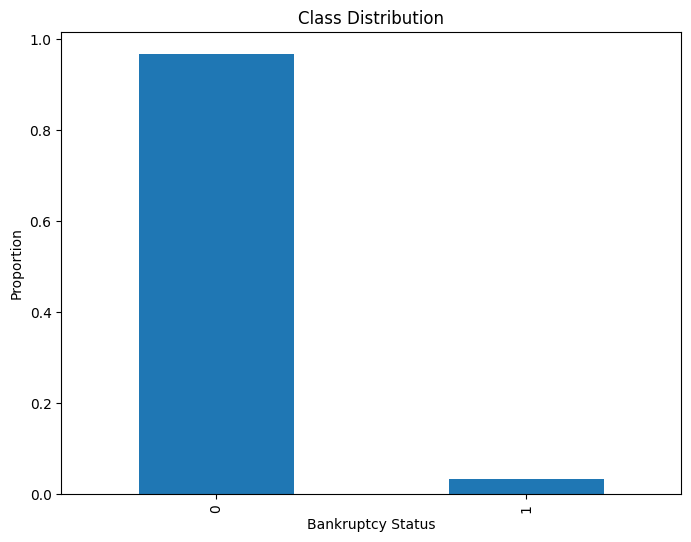

In [9]:
## 2. Data Quality Check


# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
display(missing_values[missing_values > 0])

# Check class distribution
plt.figure(figsize=(8, 6))
df['Bankrupt?'].value_counts(normalize=True).plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Bankruptcy Status')
plt.ylabel('Proportion')
plt.show()

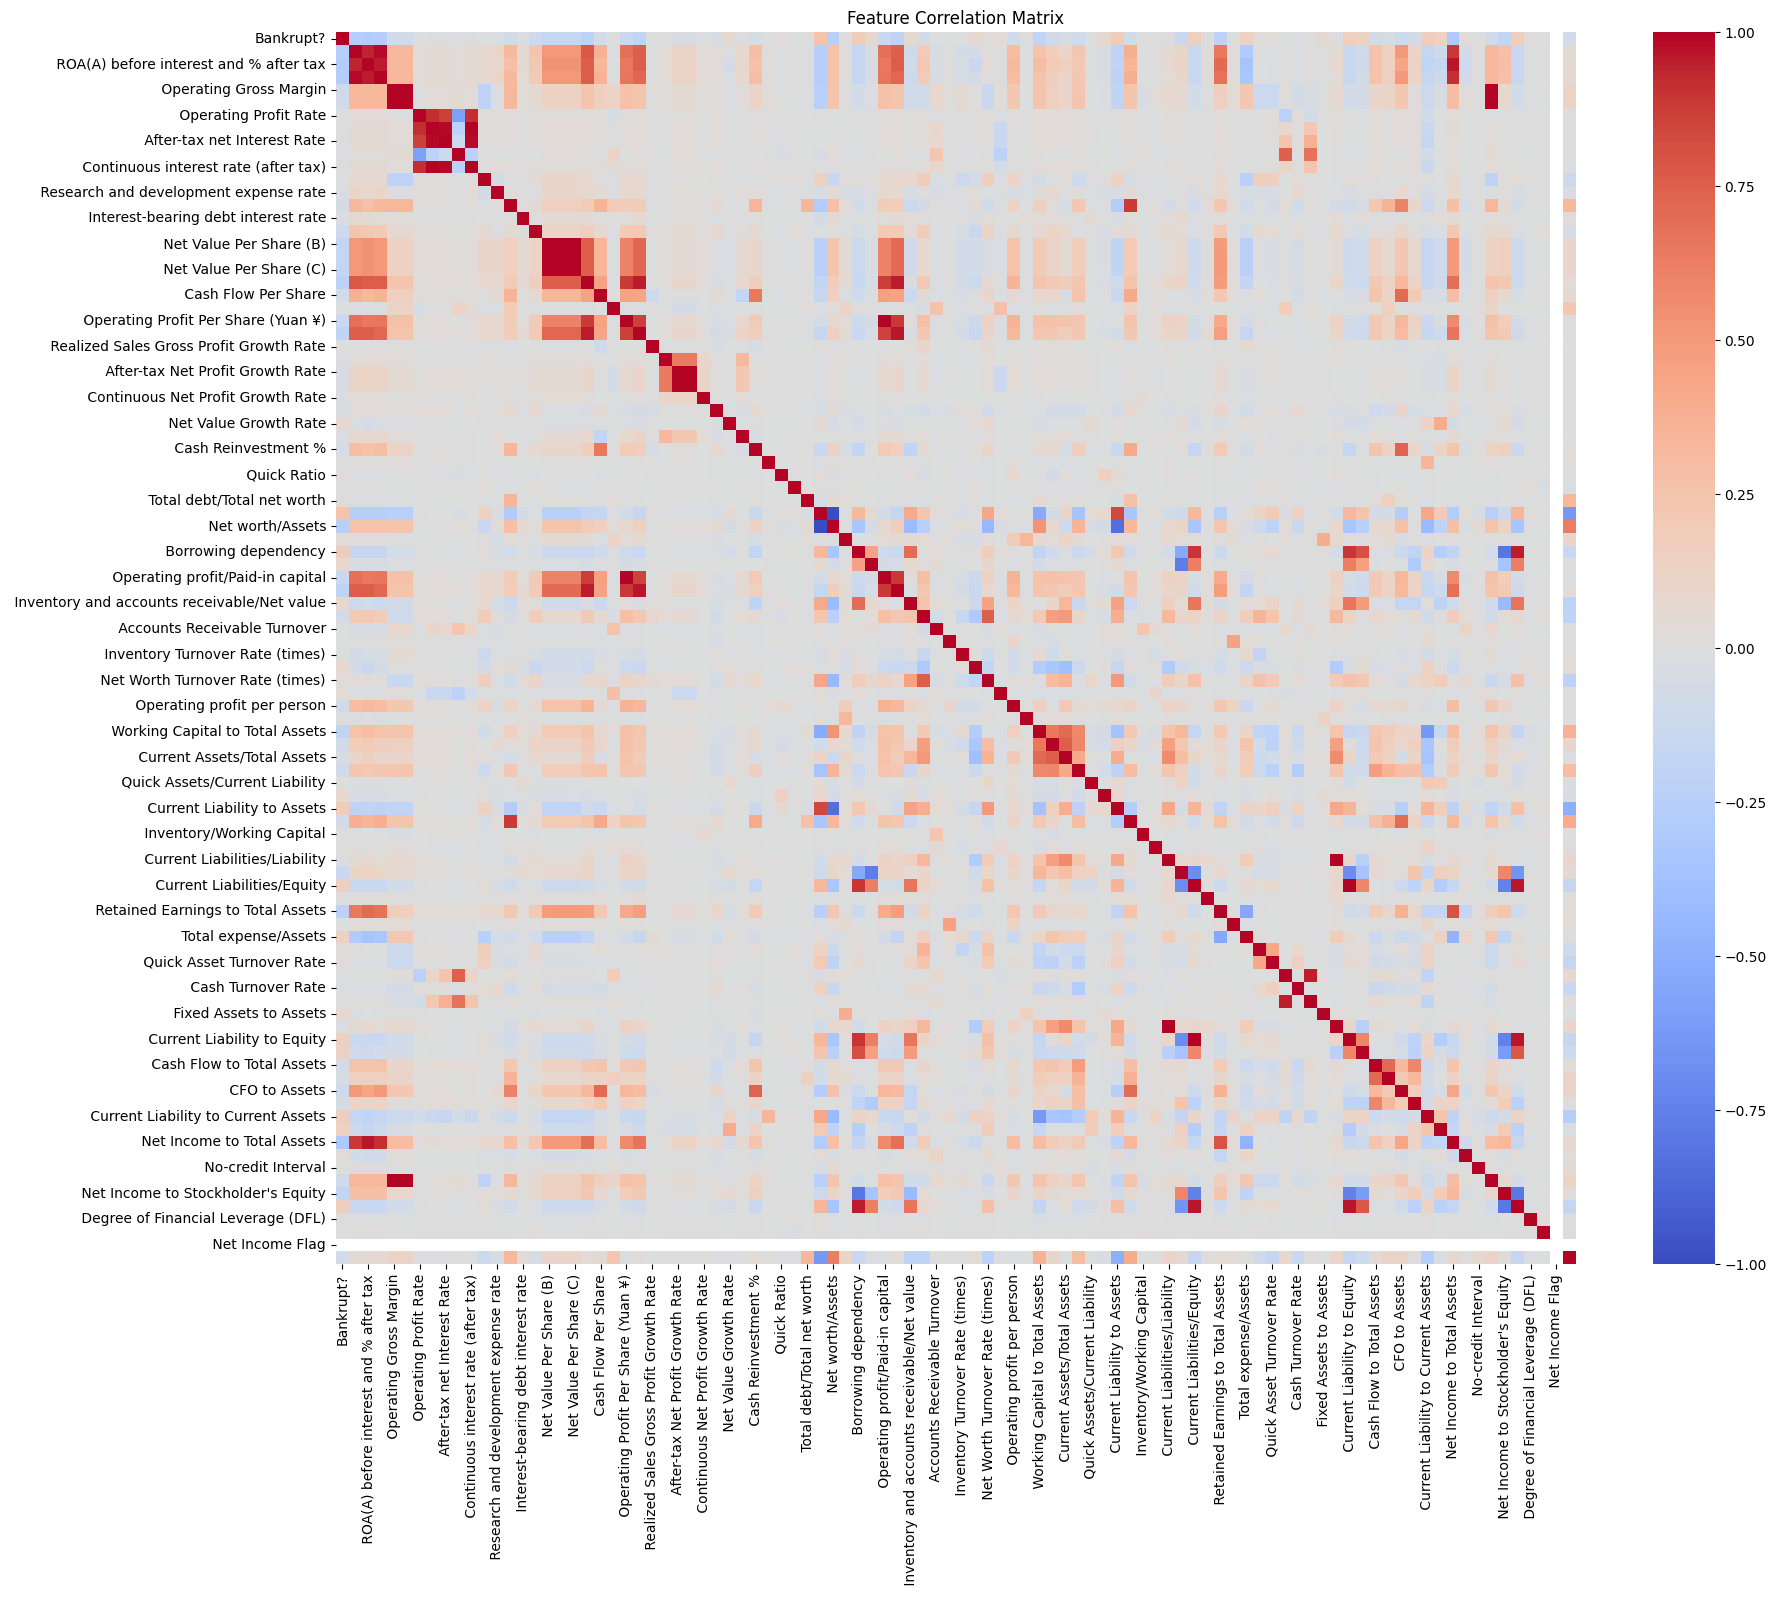

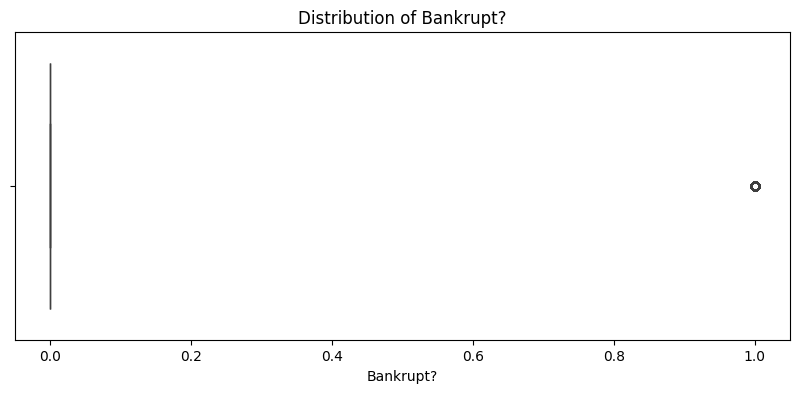

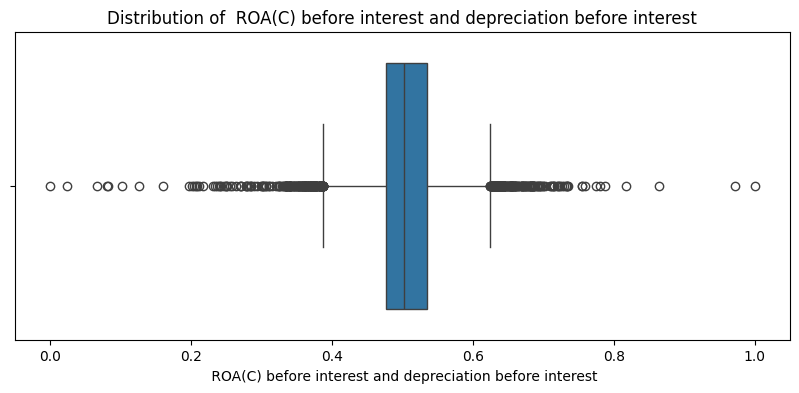

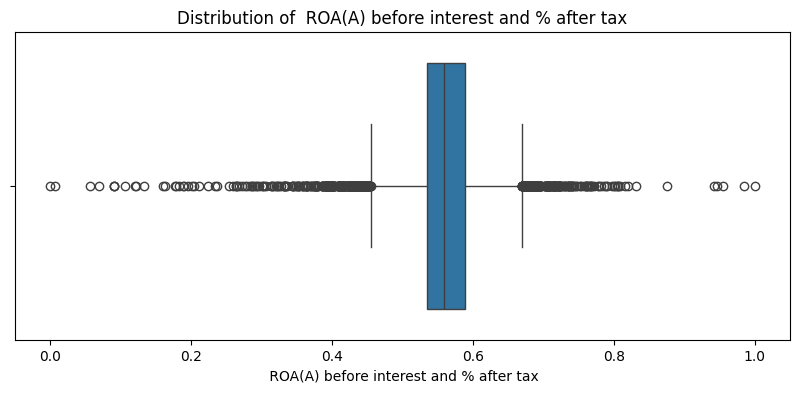

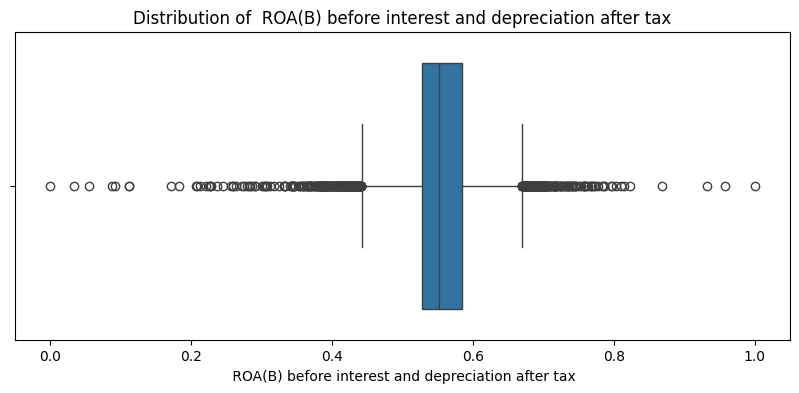

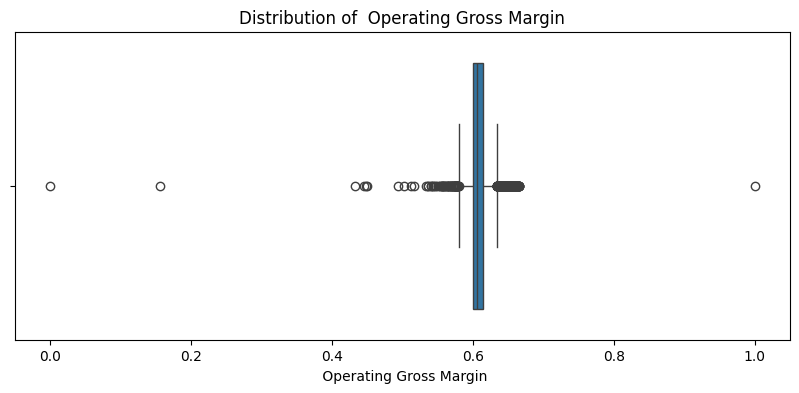

In [10]:
## 3. Feature Analysis


# Correlation analysis
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Distribution of key features
for col in df.columns[:5]:  # First 5 features as example
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


In [11]:
## 4. Data Preprocessing


# Preprocess the data
X_train, X_test, y_train, y_test, scaler = preprocess_data(df)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train).value_counts(normalize=True))


Training set shape: (10558, 95)
Testing set shape: (1364, 95)

Class distribution after SMOTE:
Bankrupt?
0    0.5
1    0.5
Name: proportion, dtype: float64
